# 1. Предобработка

Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет
1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой. 

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку square, равную width * height или perimeter Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

# Выполнение задания №1

Сначала нужно подключить все необходимые библиотеки:

In [6]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Для выполнения задания я выбрал данные о просмотре аниме пользователями с сайта [MyAnimeList.net](https://myanimelist.net/).
<p>
Следующим шагом будт загрузка dataset'ов:

In [7]:
userDataSetRaw = pd.read_csv('./DataSet-MyAnimeList/user_data.csv')
animeDataSetRaw = pd.read_csv('./DataSet-MyAnimeList/anime_data.csv')

Первые пять записей из *user_data.csv*:

In [8]:
userDataSetRaw.head()

,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
0,-0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,0,477,3,NaN,NaN,2017-09-19T00:00:00+00:00,2020-09-25 11:03:22+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '..."
1,-Droid-,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,53,2271,7,1930-01-07T00:00:00+00:00,Male,2013-09-07T00:00:00+00:00,2020-09-17 21:07:00+00:00,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '..."
2,-Hentai,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05T00:00:00+00:00,Male,2014-05-19T00:00:00+00:00,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '..."
3,-Jens,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,0,518,5,NaN,NaN,2020-06-11T00:00:00+00:00,2020-09-24 14:06:00+00:00,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com..."
4,-Kano,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,2,325,5,NaN,NaN,2015-08-12T00:00:00+00:00,2020-09-26 01:29:32+00:00,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co..."


Первые пять записей из *anime_data.csv*:

In [9]:
animeDataSetRaw.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


Прежде чем переходить к отбрасыванию недостающих данных, я решил более детально проанализировать data set, чтобы решить,
как лучше поступить с пропусками:

In [10]:
def analysisMissingValue(df: pd.DataFrame):

    df.info()

    print('\n{}\n'.format('=' * 30))
    print('{:<16} {:>2}'.format('Column', 'Procent of missing'))
    print('{:<16} {:>2}'.format('-' * len('Column'), '-' * len('Procent of missing')))
    for col in df.columns:
        ratioOfMissing = np.mean(df[col].isnull())
        print('{:<16} - {:>2}%'.format(col, round(ratioOfMissing*100)))

    fig, ax = plt.subplots(1, 2, figsize = (16, 8))

    # определяем цвета 
    # желтый - пропущенные данные, темно синий - не пропущенные
    yellowColor = '#ffff00'
    blueColor = '#000080'
    colours = [blueColor, yellowColor] 
    sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), ax=ax[0])
    ax[0].set_title('Null value Heatmap', fontdict={'fontsize':12}, pad=12);

    index = []
    count = []
    for col in df.columns:
        miss = df[col].isnull()
        countMiss = np.sum(miss)
        if countMiss > 0:  
            index.append(col)
            count.append(countMiss)
    ax[1].bar(index, count)
    ax[1].set_title('Null value Bar charts', fontdict={'fontsize':12}, pad=12)

    fig.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2195 non-null   object 
 1   planning          2195 non-null   object 
 2   watched           2195 non-null   object 
 3   completed         2195 non-null   int64  
 4   days_watched      2195 non-null   float64
 5   dropped           2195 non-null   int64  
 6   episodes_watched  2195 non-null   int64  
 7   mean_score        2195 non-null   float64
 8   on_hold           2195 non-null   int64  
 9   plan_to_watch     2195 non-null   int64  
 10  rewatched         2195 non-null   int64  
 11  total_entries     2195 non-null   int64  
 12  watching          2195 non-null   int64  
 13  birthday          1261 non-null   object 
 14  gender            1751 non-null   object 
 15  joined            2195 non-null   object 
 16  last_online       2195 non-null   object 


,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching
count,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000
mean,433.814123,122.496674,28.907517,7719.424146,7.066588,19.630979,192.500683,20.524829,694.082005,19.226879
std,701.161822,131.530904,208.860362,9390.248439,1.515720,49.139325,445.081841,90.231621,995.627147,57.267595
min,3.000000,0.400000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,157.000000,51.500000,1.000000,3153.500000,6.615000,1.500000,34.000000,0.000000,280.500000,4.000000
50%,273.000000,90.700000,8.000000,5518.000000,7.260000,7.000000,94.000000,1.000000,472.000000,8.000000
75%,490.500000,148.550000,24.000000,9233.000000,7.890000,19.000000,212.000000,13.000000,796.500000,17.000000
max,14025.000000,1928.400000,9012.000000,151474.000000,10.000000,1400.000000,12517.000000,2515.000000,17118.000000,1747.000000


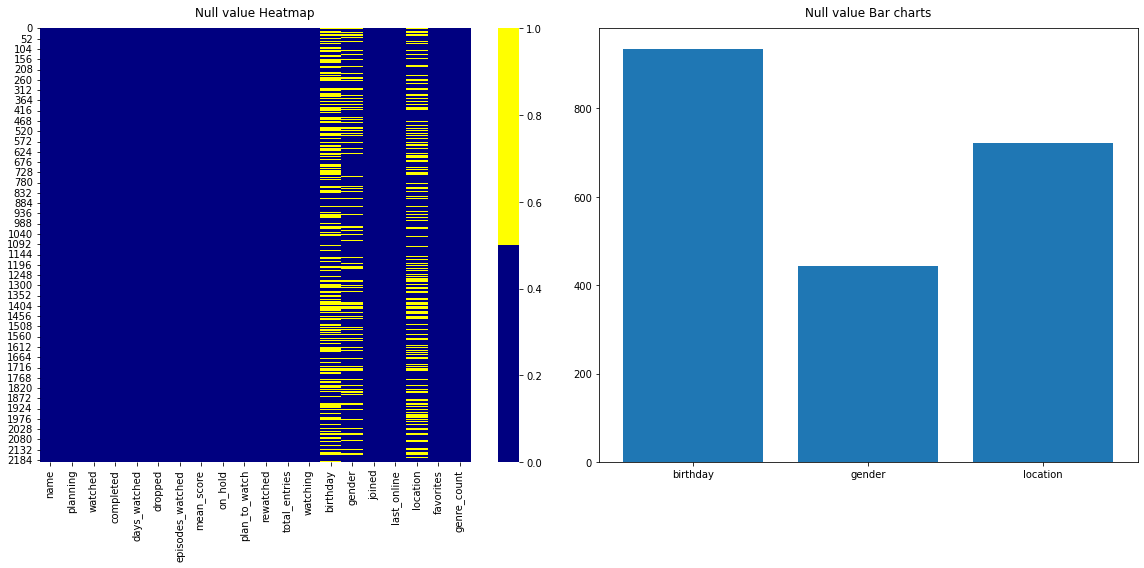

In [11]:
analysisMissingValue(userDataSetRaw)
userDataSetRaw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         11335 non-null  int64  
 1   aired_from     11330 non-null  object 
 2   aired_to       5967 non-null   object 
 3   duration       11335 non-null  object 
 4   episodes       11335 non-null  int64  
 5   genres         11335 non-null  object 
 6   popularity     11335 non-null  int64  
 7   premiered      3455 non-null   object 
 8   rank           10053 non-null  float64
 9   rating         11335 non-null  object 
 10  score          11335 non-null  float64
 11  scored_by      11335 non-null  int64  
 12  source         11335 non-null  object 
 13  status         11335 non-null  object 
 14  studios        11335 non-null  object 
 15  synopsis       11098 non-null  object 
 16  title          11335 non-null  object 
 17  title_english  5394 non-null   object 
 18  type  

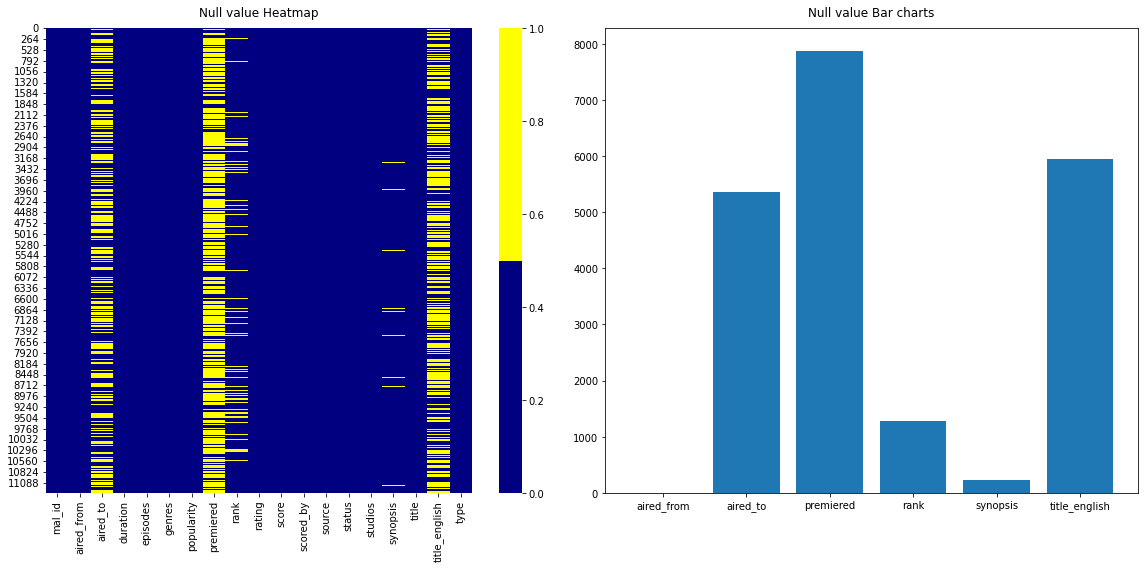

In [12]:
analysisMissingValue(animeDataSetRaw)

Из полученных данных я вижу, что в *user_data.csv* на хватает следующих данных:
    * birthday
    * gender
    * location

В *anime_data.csv* на хватает следующих данных:
    * aired_from
    * aired_to
    * premiered
    * rank
    * synopsis
    * title_english

Хочу заметить, что в случае с dataset'ом *anime_data.csv*
диаграмма *Bar chars* помогла мне обнаружить недостающие данные в категории `aired_from`.
*Heatmap* и *Процентный список* были не полностью информативны.

---

Теперь нужно решить что делать с недостающими данными.
<p></p>

Сначала я хочу понять за что отвечает каждый параметр:
* name                 object - имя пользователя
* planning             object - список запланированных аниме
* watched              object - список просмотренных аниме
* completed             int64 - кол-во просмотренных аниме
* days_watched        float64 - сколько суммарно дней было затрачено на просмотр аниме
* dropped               int64 - кол-во аниме, которые были заброшены
* episodes_watched      int64 - суммарное кол-во просмотренных серий аниме
* mean_score          float64 - средняя оценка аниме, которую проставил сам пользователь
* on_hold               int64 - кол-во отложенных аниме
* plan_to_watch         int64 - кол-во запланированных аниме
* rewatched             int64 - кол-во пересмотренных аниме
* total_entries         int64 - всего записей в разделе "Anime Stats"
* watching              int64 - кол-во просмотренных аниме
* birthday             object - день рождения
* gender               object - гендер
* joined               object - когда зарегистрировался
* last_online          object - когда был последний раз в онлайн
* location             object - откуда пользователь
* favorites            object - любимые аниме
* genre_count          object - список жанров/статистика жанров

---

Я собираюсь откинуть категорию *name* так как она не информативна и слишком разнообразна.

Я собираюсь оставить категорию *birthday* так как хочу узнать средний возраст любителей аниме.

Я собираюсь оставить категорию *gender* так как хочу узнать кто все таки больше любит аниме.

Я собираюсь оставить категорию *location* так как хочу знать в какой стране аниме любят больше всего.

---

Подводя итоги, я собираюсь все недостающие значения оставить.
*birthday* усреднить, для *gender* выделить категорию *other*,
для *location* выделить категорию *other*.


In [13]:
user_df = userDataSetRaw.copy()
user_df['gender'] = user_df['gender'].fillna('Other')
user_df['location'] = user_df['location'].fillna('Other')
user_df = user_df.drop(['name'], axis=1)
user_df.head()

,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,0,477,3,NaN,Other,2017-09-19T00:00:00+00:00,2020-09-25 11:03:22+00:00,Other,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '..."
1,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,53,2271,7,1930-01-07T00:00:00+00:00,Male,2013-09-07T00:00:00+00:00,2020-09-17 21:07:00+00:00,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '..."
2,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05T00:00:00+00:00,Male,2014-05-19T00:00:00+00:00,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '..."
3,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,0,518,5,NaN,Other,2020-06-11T00:00:00+00:00,2020-09-24 14:06:00+00:00,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com..."
4,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,2,325,5,NaN,Other,2015-08-12T00:00:00+00:00,2020-09-26 01:29:32+00:00,Other,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co..."


In [14]:
import datetime

def to_date(value: object) -> datetime:
    result = str(value).split('-')
    try:
        return datetime.datetime(int(result[0]), int(result[1]), int(result[2][0:2]))
    except ValueError:
        return None

In [15]:
user_df['birthday'] = user_df.birthday.apply(to_date)
user_df['joined'] = user_df.joined.apply(to_date)
user_df['birthday'] = user_df['birthday']\
    .fillna(user_df['birthday'].mean())

user_df.head()

,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,0,477,3,1997-11-16 04:50:03.330689920,Other,2017-09-19,2020-09-25 11:03:22+00:00,Other,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '..."
1,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,53,2271,7,1930-01-07 00:00:00.000000000,Male,2013-09-07,2020-09-17 21:07:00+00:00,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '..."
2,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05 00:00:00.000000000,Male,2014-05-19,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '..."
3,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,0,518,5,1997-11-16 04:50:03.330689920,Other,2020-06-11,2020-09-24 14:06:00+00:00,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com..."
4,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,2,325,5,1997-11-16 04:50:03.330689920,Other,2015-08-12,2020-09-26 01:29:32+00:00,Other,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co..."


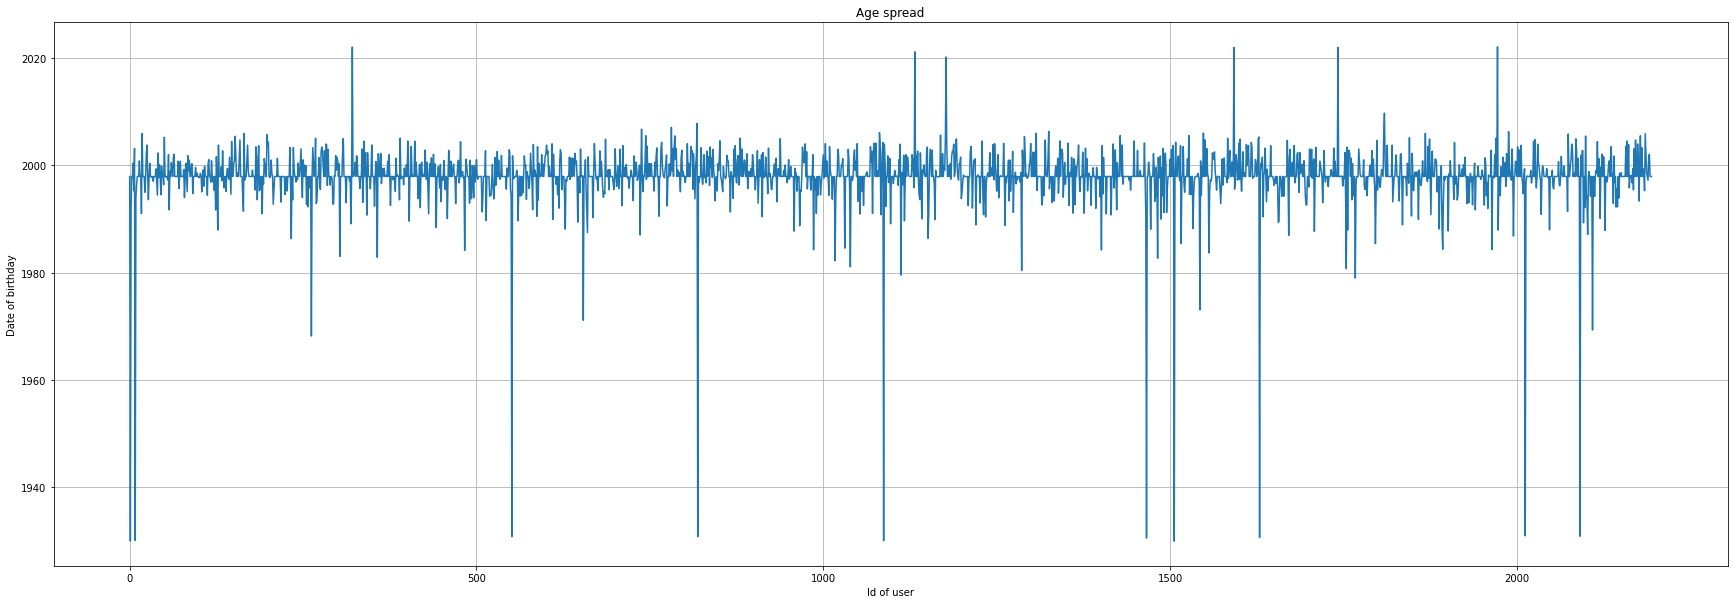

In [16]:
from datetime import timedelta

plt.figure(figsize = (30,10))
plt.title('Age spread')
plt.ylabel('Date of birthday')
plt.xlabel('Id of user')
plt.grid(True, "major")

# y_ticks = []
# start_date = user_df['birthday'].min()
# end_date = user_df['birthday'].max()
# y_ticks = [start_date.year, end_date.year]
# delta = timedelta(weeks=52 * 5) # 1 year = 52 weeks
# while start_date <= end_date:
#     y_ticks.append(start_date.strftime('%Y'))
#     start_date += delta

plt.plot(user_df['birthday'])

Из данного графика мы видим, что год рождения в основном лежит в диапазоне от 1990 до 2010.

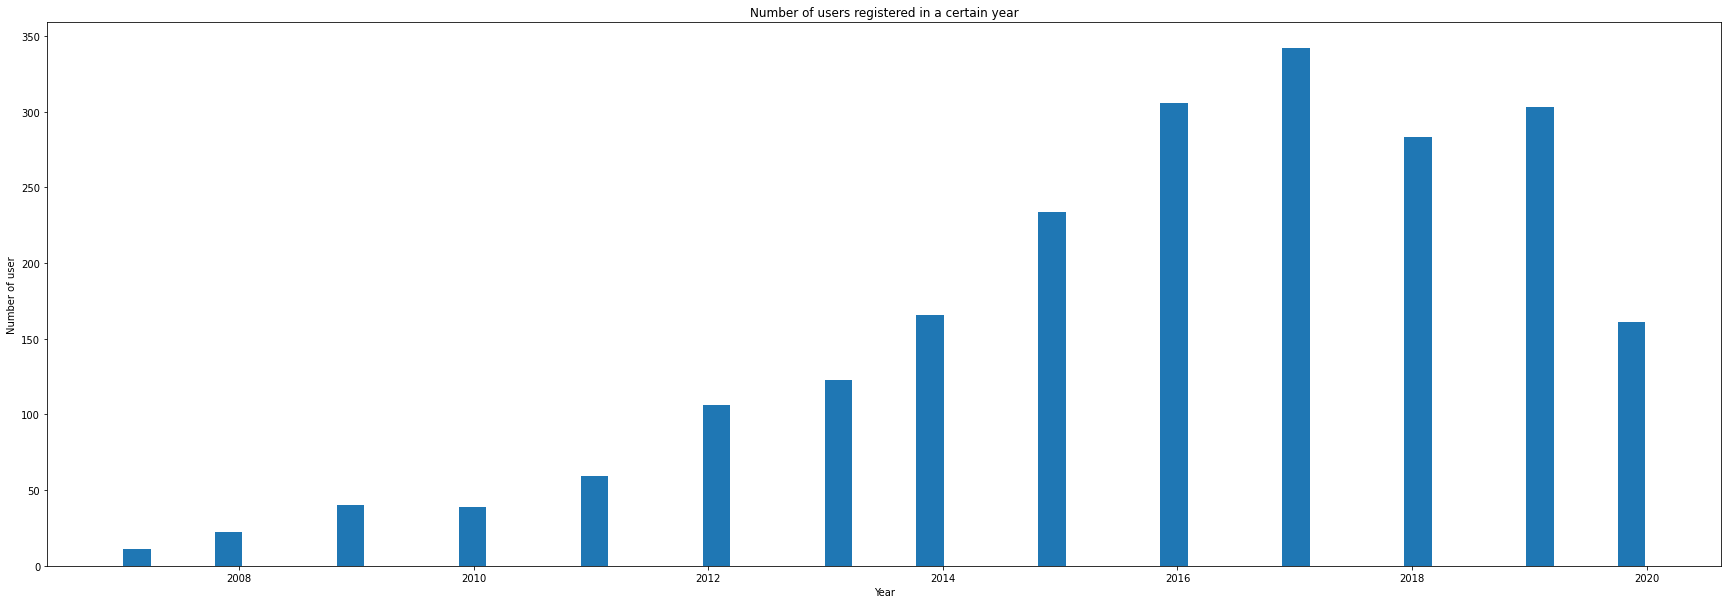

In [17]:
from pandas import Timestamp

def get_year(date: Timestamp) -> int:
    return date.year.real

plt.figure(figsize = (30,10))
value_counts, bins_names, visual_figure = plt.hist(user_df.joined.apply(get_year), bins=50, rwidth=0.9)
plt.title('Number of users registered in a certain year')
plt.xlabel('Year')
plt.ylabel('Number of user')
plt.show()

Мы видим что в 2017 году на сайт прибыло больше всего новых пользователей.

Гипотеза: возможно это из-за того, что в 2017 году вышел 2 сезон *Shingeki no Kyojin*

Text(0, 0.5, 'Number of days')

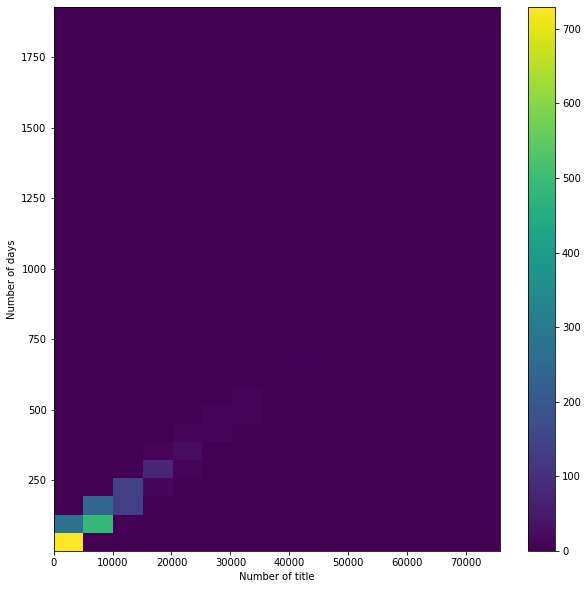

In [23]:
plt.figure(figsize = (10,10))
x = user_df.episodes_watched
y = user_df.days_watched
h,_, _, image = plt.hist2d(x, y, bins=30)
plt.colorbar(image)
plt.xlim(0, x.max()/2)
plt.xlabel('Number of title')
plt.ylabel('Number of days')

Можно сделать вывод, что в основном пользователи потратили не больше 200 дней своей жизни на просмотр аниме
и посмотрели не больше 15000 тайтлов.

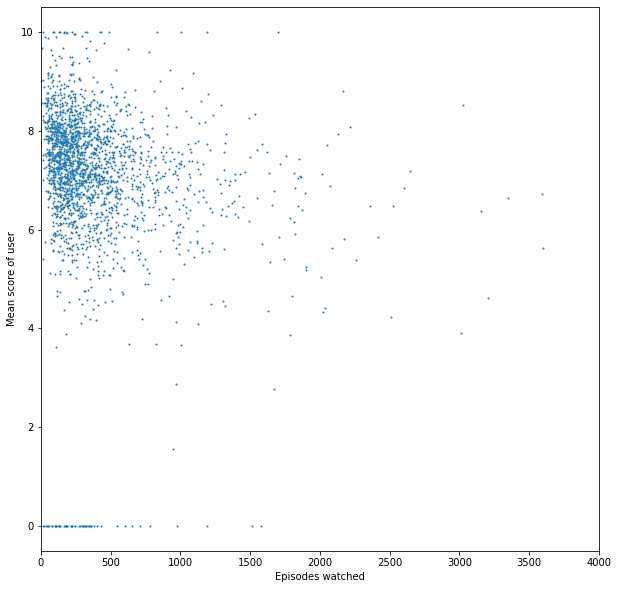

In [25]:
x = user_df.completed
y = user_df.mean_score
plt.figure(figsize = (10,10))
plt.scatter(x, y, s=1)
plt.xlabel('Episodes watched')
plt.ylabel('Mean score of user')
plt.xlim(0, 4000)
plt.show()

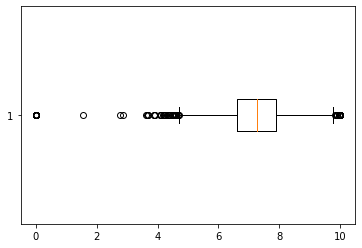

In [15]:
plt.boxplot(user_df.mean_score, vert=False)
plt.show()

Данный график нам показывает среднюю оценку пользователей

In [28]:
from numpy import float64

def action(days: float64) -> float64:
    return days * 24

user_df.loc[:, 'hours_watched'] = user_df.days_watched.apply(action)
user_df.head()
user_df.to_csv('./DataSet-MyAnimeList/user_data_new.csv')

In [31]:
check = pd.read_csv('./DataSet-MyAnimeList/user_data_new.csv')
check.head()

,Unnamed: 0,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,...,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count,hours_watched
0,0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,...,477,3,1997-11-16 04:50:03.330689920,Other,2017-09-19 00:00:00.000000000,2020-09-25 11:03:22+00:00,Other,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '...",4358.4
1,1,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,...,2271,7,1930-01-07 00:00:00.000000000,Male,2013-09-07 00:00:00.000000000,2020-09-17 21:07:00+00:00,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '...",6319.2
2,2,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,...,1070,26,1991-11-05 00:00:00.000000000,Male,2014-05-19 00:00:00.000000000,2020-09-21 19:11:28+00:00,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '...",6489.6
3,3,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,...,518,5,1997-11-16 04:50:03.330689920,Other,2020-06-11 00:00:00.000000000,2020-09-24 14:06:00+00:00,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com...",427.2
4,4,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,...,325,5,1997-11-16 04:50:03.330689920,Other,2015-08-12 00:00:00.000000000,2020-09-26 01:29:32+00:00,Other,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co...",1564.8


In [30]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2195 non-null   int64  
 1   planning          2195 non-null   object 
 2   watched           2195 non-null   object 
 3   completed         2195 non-null   int64  
 4   days_watched      2195 non-null   float64
 5   dropped           2195 non-null   int64  
 6   episodes_watched  2195 non-null   int64  
 7   mean_score        2195 non-null   float64
 8   on_hold           2195 non-null   int64  
 9   plan_to_watch     2195 non-null   int64  
 10  rewatched         2195 non-null   int64  
 11  total_entries     2195 non-null   int64  
 12  watching          2195 non-null   int64  
 13  birthday          2195 non-null   object 
 14  gender            2195 non-null   object 
 15  joined            2195 non-null   object 
 16  last_online       2195 non-null   object 


# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

# Выполнение задания №2

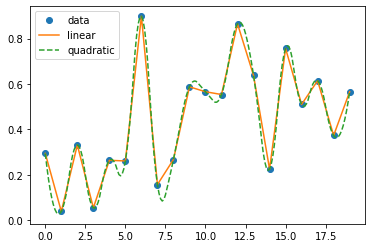

In [26]:
from scipy.interpolate import interp1d

k = 20
x = np.arange(k)
y = np.random.random(k)

step = 0.1
new_x = np.arange(0, k - (1 - step), step)
scipy_linear_func = interp1d(x, y, kind="linear")
scipy_quadratic_func = interp1d(x, y, kind="quadratic")


plt.plot(x, y, 'o',
         new_x, scipy_linear_func(new_x), '-',
         new_x, scipy_quadratic_func(new_x), '--')
plt.legend(['data', 'linear', 'quadratic'], loc='best')
plt.show()

Имплементация линейной интерполяции в библиотеке `scipy` находятся здесь [клик][scipy_linear_ref].

Линейная интерполяция представляет из-за просто соединение двух входных точек прямой y = kx + b.
Для этого используем формулу построения прямой по двум точкам.

[//]: <> (All links)
[scipy_linear_ref]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/interpolate.py#L199

18


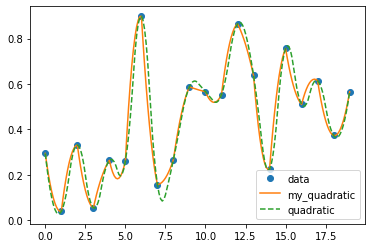

In [27]:
# F(x) = a0 + (a1 * x) + (a2 * x^2)
def my_quadratic_interp1d(x, y):
    a_array = []
    for i in range(len(x) - 2):
        a_array.append(help_func(x[i], x[i + 1], x[i + 2],
                                 y[i], y[i + 1], y[i + 2]))
    return a_array

def help_func(x0, x1, x2, y0, y1, y2):
    a2 = (y2 - y0) / ((x2 - x0) * (x2 - x1)) \
         - (y1 - y0) / ((x1 - x0) * (x2 - x1))
    a1 = (y1 - y0) / (x1 - x0) - a2 * (x1 + x0)
    a0 = y0 - a1 * x0 - a2 * x0 ** 2
    return a0, a1, a2

quadratic_func = my_quadratic_interp1d(x, y)
print(len(quadratic_func))
new_y = []
for i in range(len(new_x)):
    board = math.floor(new_x[i])
    if board >= len(quadratic_func):
        board = len(quadratic_func) - 1
    tuple = quadratic_func[board]
    new_y.append(tuple[0] +
                 (tuple[1] * new_x[i]) +
                 (tuple[2] * new_x[i] ** 2))

oldLen = len(new_y)
for i in range(len(new_x) - oldLen):
    new_y.append(0)

plt.plot(x, y, 'o',
         new_x, new_y, '-',
         new_x, scipy_quadratic_func(new_x), '--')
plt.legend(['data', 'my_quadratic', 'quadratic'], loc='best')
plt.show()

Имплементация `quadratic` интерполяции в библиотеке `scipy` находятся здесь [клик][scipy_quadratic_ref_1].

Если быть более точным, то здесь [клак][scipy_quadratic_ref_2].

Если быть еще более точнее, то здесь [клик-клак][scipy_quadratic_ref_3].

[//]: <> (All links)
[scipy_quadratic_ref_1]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/interpolate.py#L441
[scipy_quadratic_ref_2]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/interpolate.py#L542
[scipy_quadratic_ref_3]: https://github.com/scipy/scipy/blob/a6124626bb99d73aa7f99bf8e3da7d9e2c670aa8/scipy/interpolate/_bsplines.py#L1090

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

Значения колонок: [3. 2. 2. 2.]
Названия колонок: [1.   1.75 2.5  3.25 4.  ]


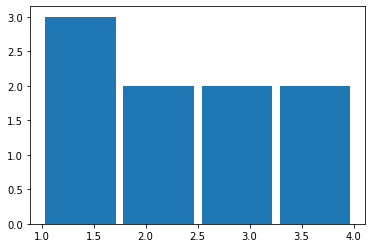

In [30]:
# Пример гистограммы с помощью plt.hist()
import matplotlib.pyplot as plt

array = [1,1,2,3,4,1,2,3,4]
value_counts, bins_names, visual_figure = plt.hist(array, 
                                                   bins=len(set(array)),
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [31]:
from typing import List, Tuple, Union
from collections import Counter

def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """

    dict_unique = Counter(array)
    unique_counts = []
    unique = sorted(dict_unique)
    for i in sorted(dict_unique):
        unique_counts.append(dict_unique[i])
    min_elem = min(array)
    max_elem = max(array)
    step = (max_elem - min_elem) / bins
    labels = np.arange(min_elem, max_elem + step, step)
    value_counts = [0] * (len(labels) - 1)
    index_unique = 0
    index_labels = 0
    while True:
        if index_labels == len(labels) - 1:
            break
        if index_unique == len(unique):
            break

        if (labels[index_labels] <= unique[index_unique]) and \
            (unique[index_unique] < labels[index_labels + 1]):
            value_counts[index_labels] += dict_unique[unique[index_unique]]
            index_unique += 1
        else:
            index_labels += 1
    value_counts[-1] += dict_unique[unique[-1]]
    return value_counts, labels

Значения колонок: [1. 1. 0. 2. 2. 0. 2. 0. 1. 2. 1. 1. 1. 3. 3. 2. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 2. 0. 1. 1. 1. 3. 1. 0. 1. 1. 2. 0. 2. 0. 2. 0. 0. 0. 0. 1. 2. 0. 0.
 0. 1.]
Названия колонок: [0.01148896 0.03125397 0.05101898 0.07078399 0.090549   0.11031401
 0.13007902 0.14984403 0.16960904 0.18937405 0.20913906 0.22890407
 0.24866908 0.26843409 0.2881991  0.30796411 0.32772912 0.34749413
 0.36725914 0.38702415 0.40678916 0.42655417 0.44631918 0.46608419
 0.4858492  0.50561421 0.52537922 0.54514423 0.56490924 0.58467425
 0.60443926 0.62420428 0.64396929 0.6637343  0.68349931 0.70326432
 0.72302933 0.74279434 0.76255935 0.78232436 0.80208937 0.82185438
 0.84161939 0.8613844  0.88114941 0.90091442 0.92067943 0.94044444
 0.96020945 0.97997446 0.99973947]


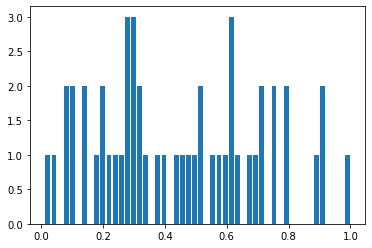

In [36]:
k = 1000
array = np.random.random(50)
value_counts, bins_names, visual_figure = plt.hist(array,
                                    bins=len(set(array)),
                                    rwidth=0.8)
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

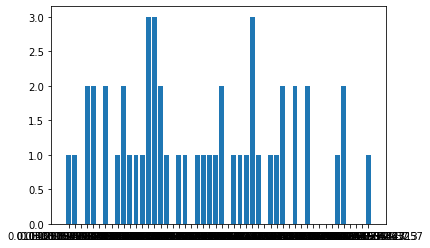

Значения колонок: [1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 1, 3, 3, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 3, 1, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1]
Названия колонок: [0.01148896 0.03125397 0.05101898 0.07078399 0.090549   0.11031401
 0.13007902 0.14984403 0.16960904 0.18937405 0.20913906 0.22890407
 0.24866908 0.26843409 0.2881991  0.30796411 0.32772912 0.34749413
 0.36725914 0.38702415 0.40678916 0.42655417 0.44631918 0.46608419
 0.4858492  0.50561421 0.52537922 0.54514423 0.56490924 0.58467425
 0.60443926 0.62420428 0.64396929 0.6637343  0.68349931 0.70326432
 0.72302933 0.74279434 0.76255935 0.78232436 0.80208937 0.82185438
 0.84161939 0.8613844  0.88114941 0.90091442 0.92067943 0.94044444
 0.96020945 0.97997446 0.99973947]


In [37]:
value_counts, bins_names = fast_hist(array, len(set(array)))

y_pos = np.arange(len(value_counts))
plt.bar(y_pos, value_counts)
plt.xticks(y_pos, bins_names[0:-1])
plt.show()

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

def temp():
    value_counts, bins_names = fast_hist(array, len(set(array)))
    y_pos = np.arange(len(value_counts))
    plt.bar(y_pos, value_counts)
    plt.xticks(y_pos, bins_names[0:-1])
    plt.show()

# Сравнение скорости:

25.3 ms ± 710 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


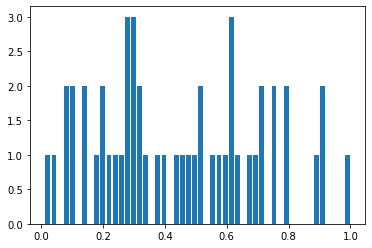

In [38]:

%timeit plt.hist(array, bins=len(set(array)), rwidth=0.8)

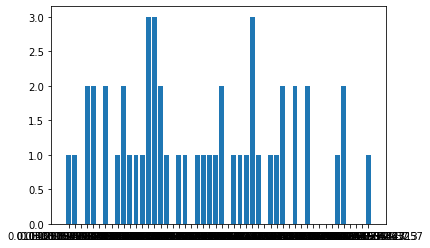

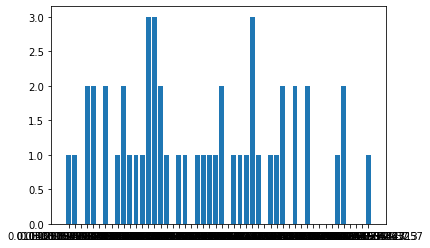

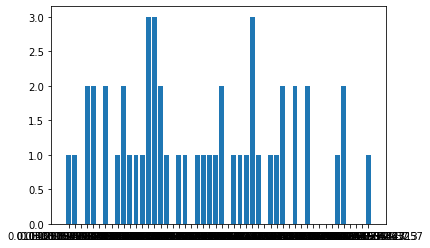

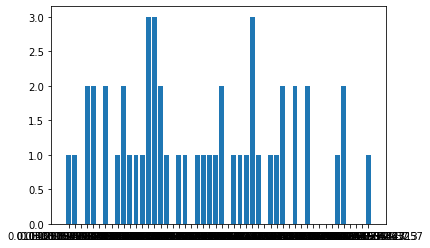

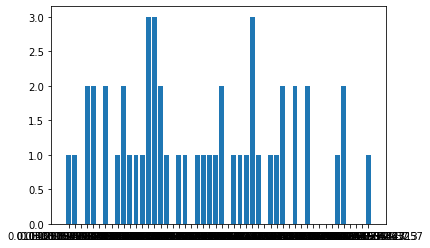

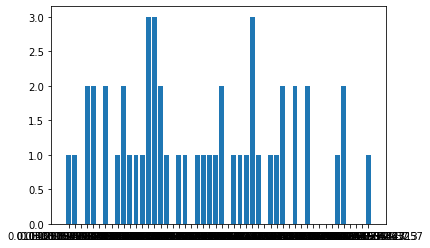

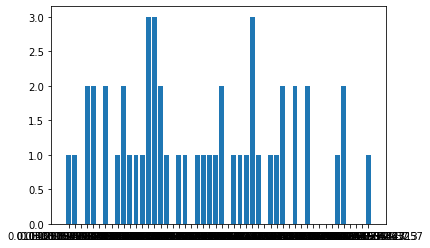

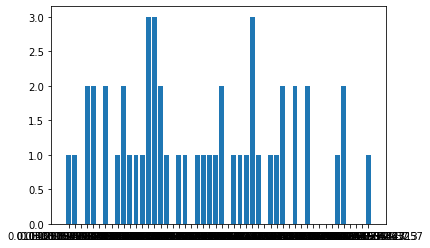

518 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit temp()